Часть 1. EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv ('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Переменные, которые пока нужно убрать по условиям задания: id, name, host_id, host_name, last_review
df = df.drop(["id", "name", "host_id", "host_name", "last_review" ], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
df.shape

(48895, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [9]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#Видим что пропуски в данных только в столбце reviews_per_month (обзоры за месяц).
#Здесь можно сделать просто - заполнить NaN нулями.
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [11]:
#Далее посмотрим на barplot цены аренды (price - целевая переменная) в зависимости от категориальных признаков.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

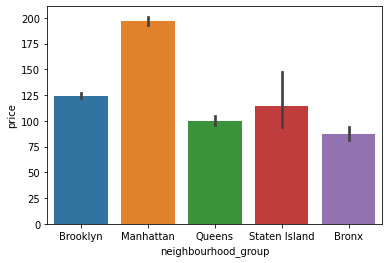

In [12]:
#Как видно самая дорогая аренда в Manhattan.
sns.barplot(data=df, x="neighbourhood_group", y="price")

<AxesSubplot:xlabel='room_type', ylabel='price'>

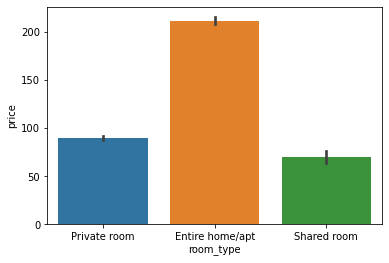

In [13]:
#Наиболее дорогие по аренде Entire home|apt room_type (целый дом и индивидуальные апартаменты).
sns.barplot(data=df, x="room_type", y="price")

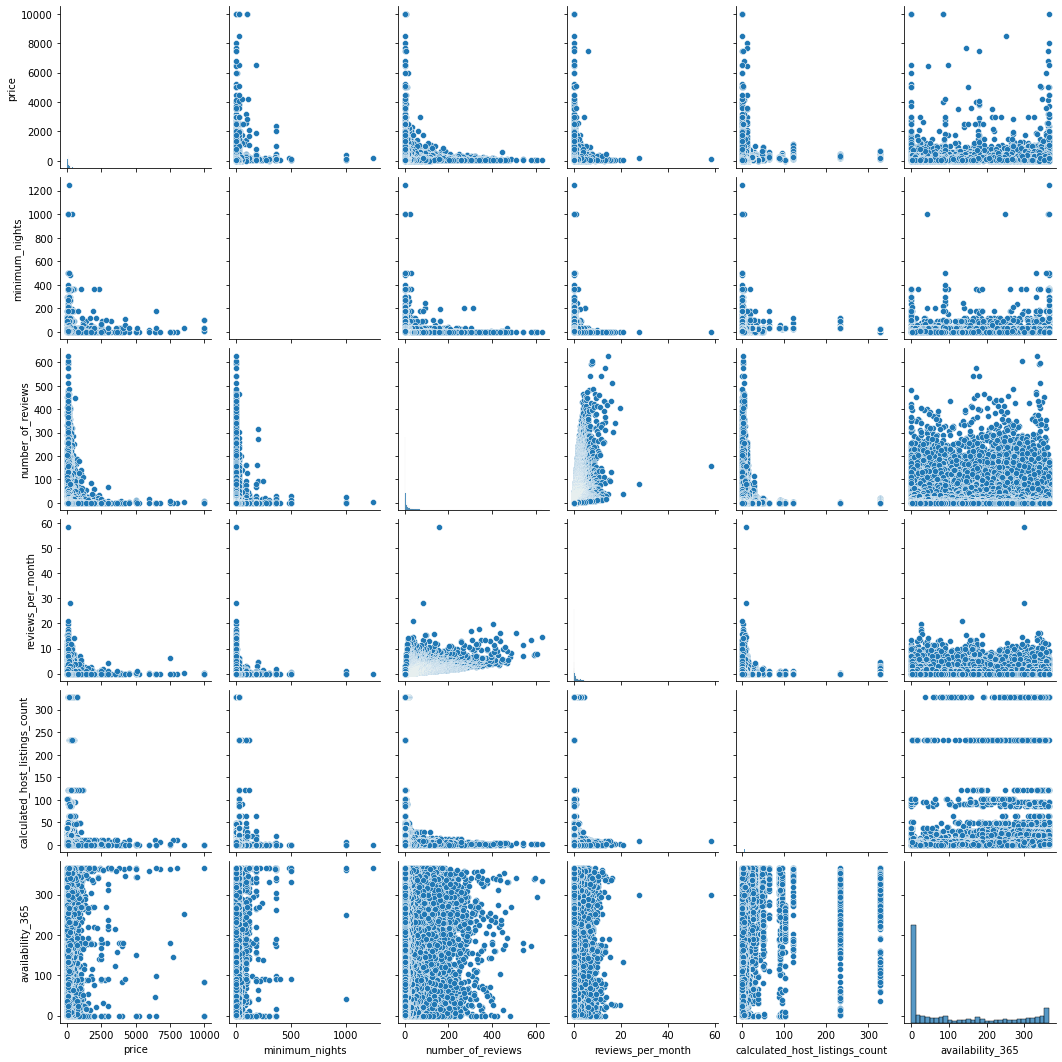

In [14]:
#Посмотрим на pairplot числовых признаков.
sns.pairplot (df[['price', 'minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365']])

#Выделить значительные зависомости по данным графикам сложновато. 
# Из линейных: чем больще цена, тем меньше отзывов
# Дорогие номера в основном снимают на недолгий срок
# Также относительно линейно-зависимы number_of_reviews и reviews_per_month (что логично).

C:\Users\zhuko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


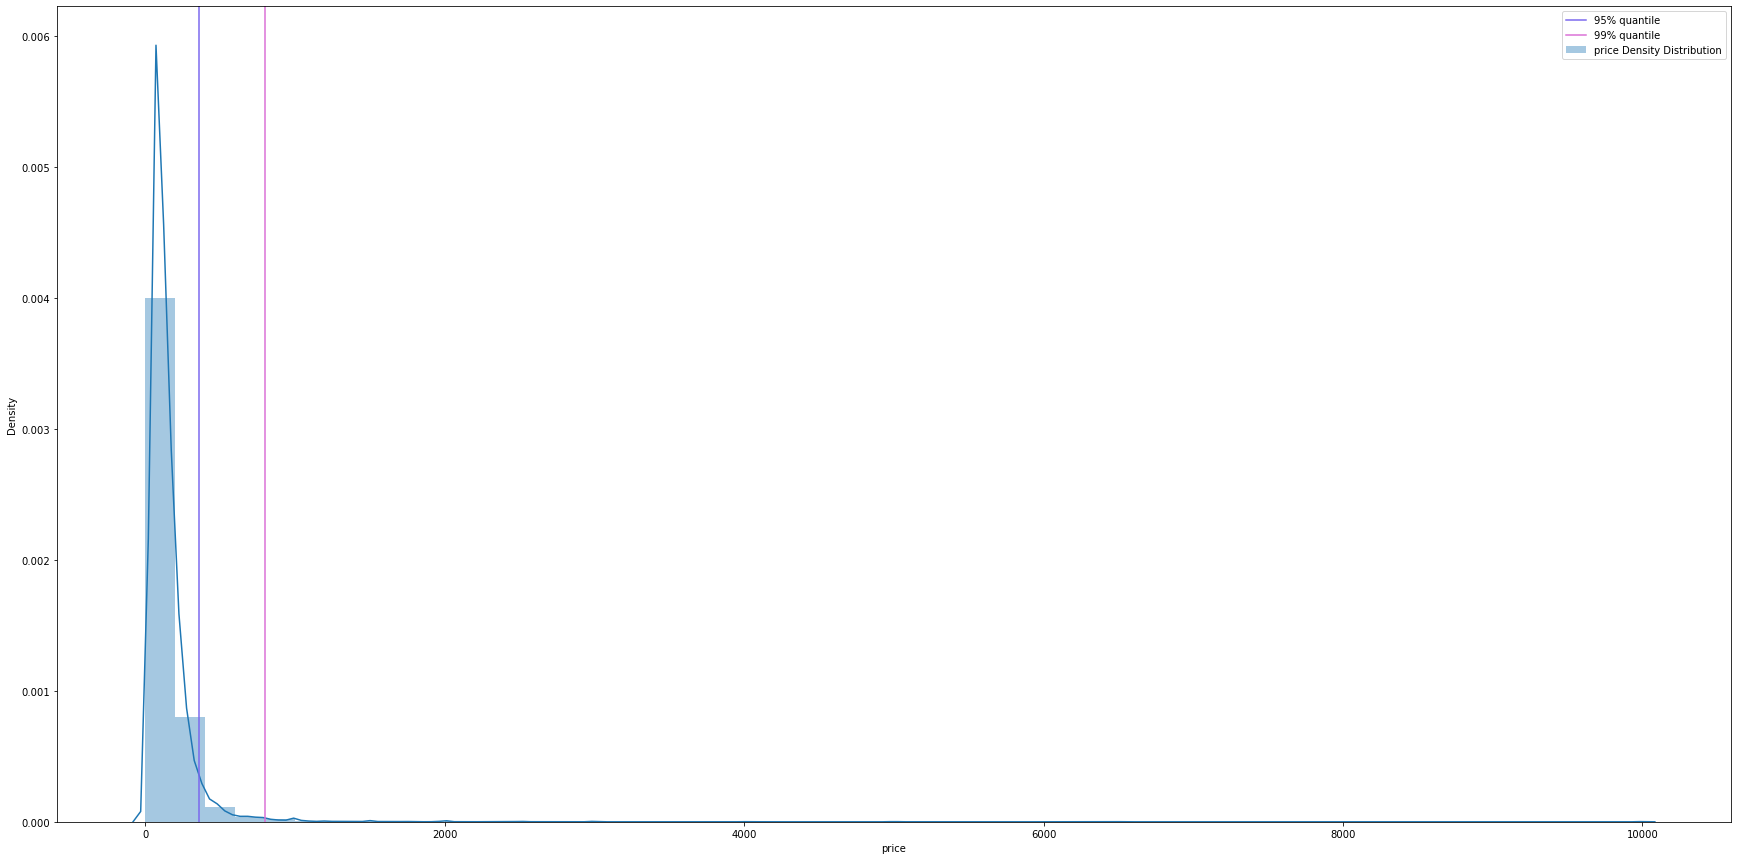

In [15]:
#Плотность распределения
plt.subplots(figsize=(30,15))
sns.distplot(df['price'], label='price Density Distribution')
plt.axvline(df.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.price.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [16]:
#На графике выше мы видим длинный тонкий хвост справа, в этом хвосте лежат "выбросы", те точки, что лежат за 95 и 99 
#квантилями. Судя по графику, имеет смысл дропнуть выбросы.
#Как можно увидеть, "потеряно" совсем немного данных. 
df=df.loc[df.price<df.price.quantile(0.99)]
df.shape

(48403, 11)

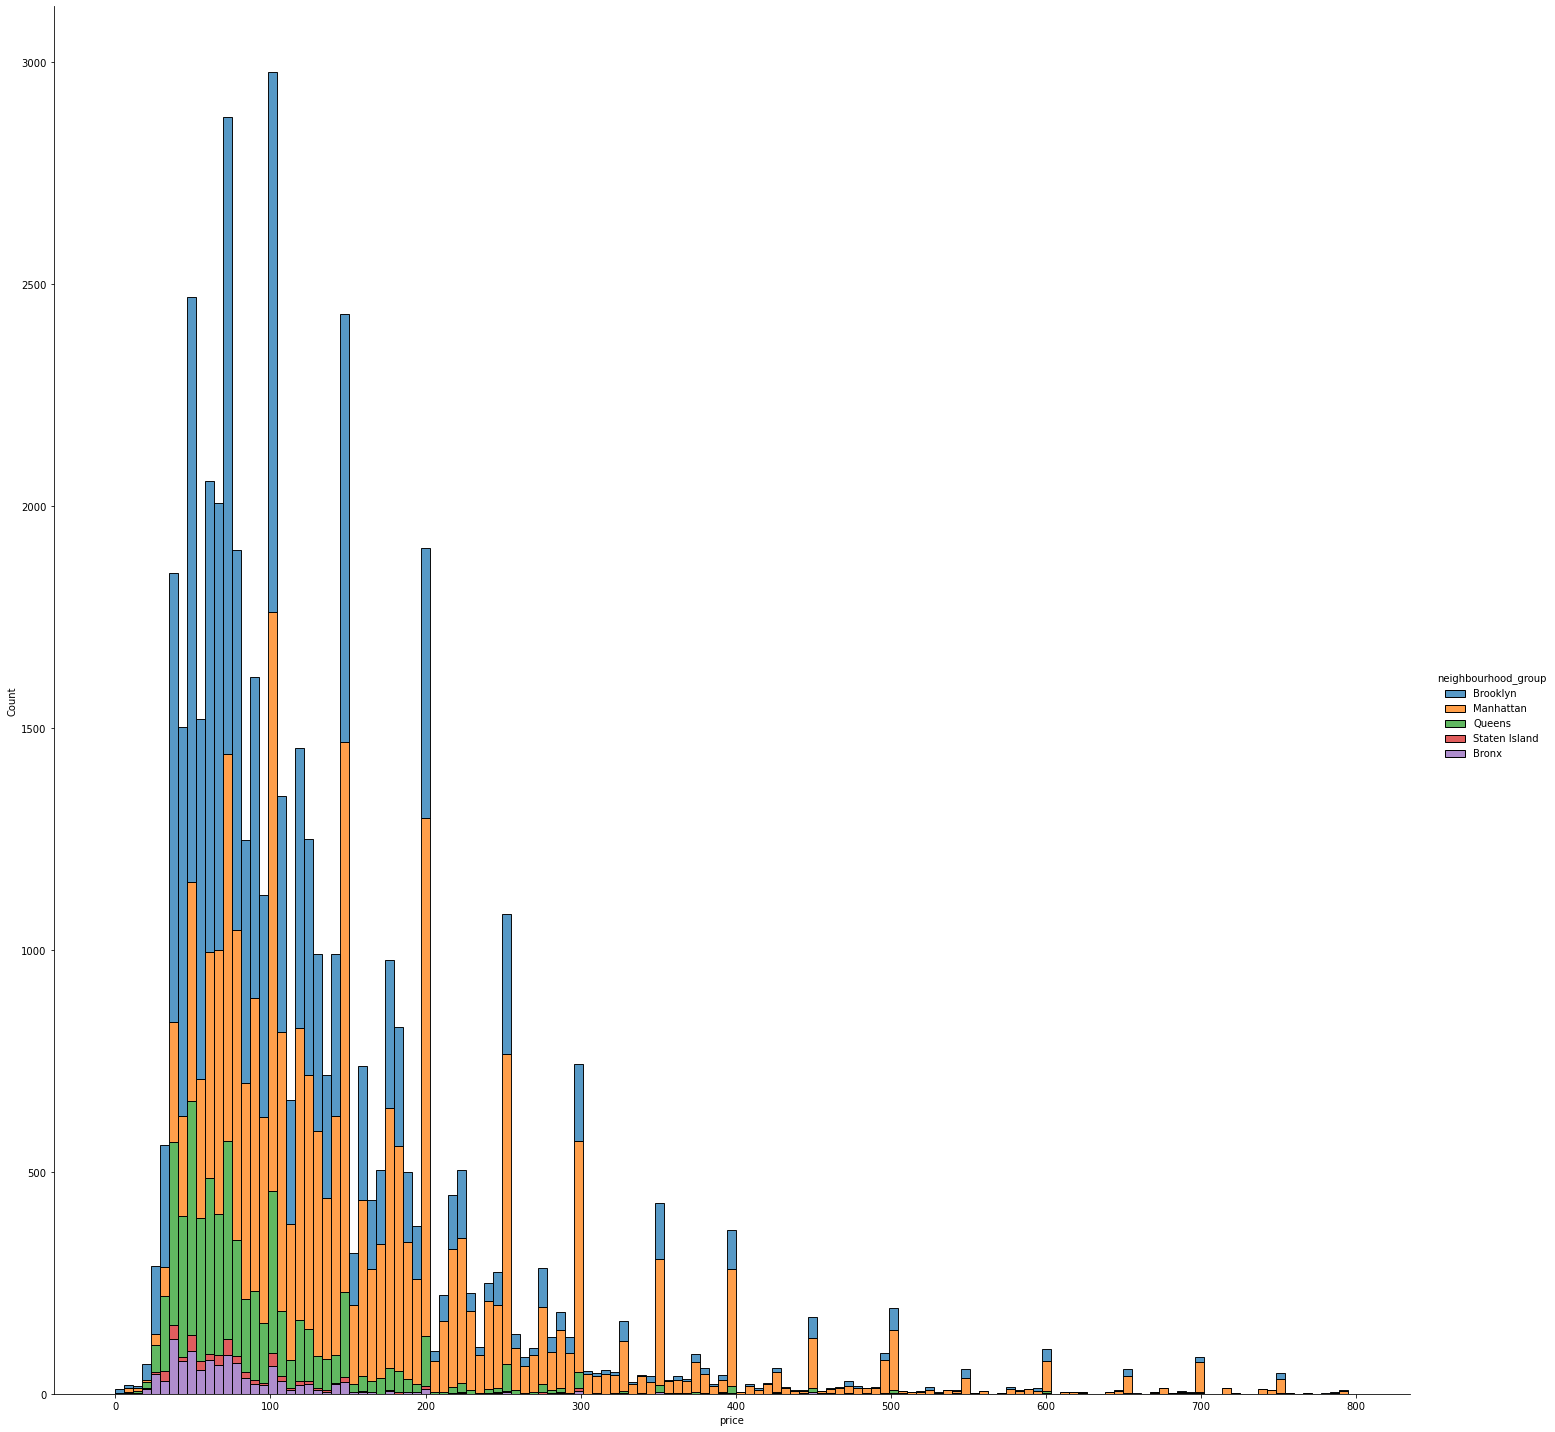

In [17]:
#Можем также посмотреть на распределение количества цен в зависимости от районов
sns.displot(data=df, x="price", hue="neighbourhood_group", multiple="stack", height=20)
#Видно что больше всего сдается квартир в Бруклине по всему диапазону цен.
#В то время как Стейтен Айленд и Бронкс в основном представлены недорогими вариантами до 100 долл.

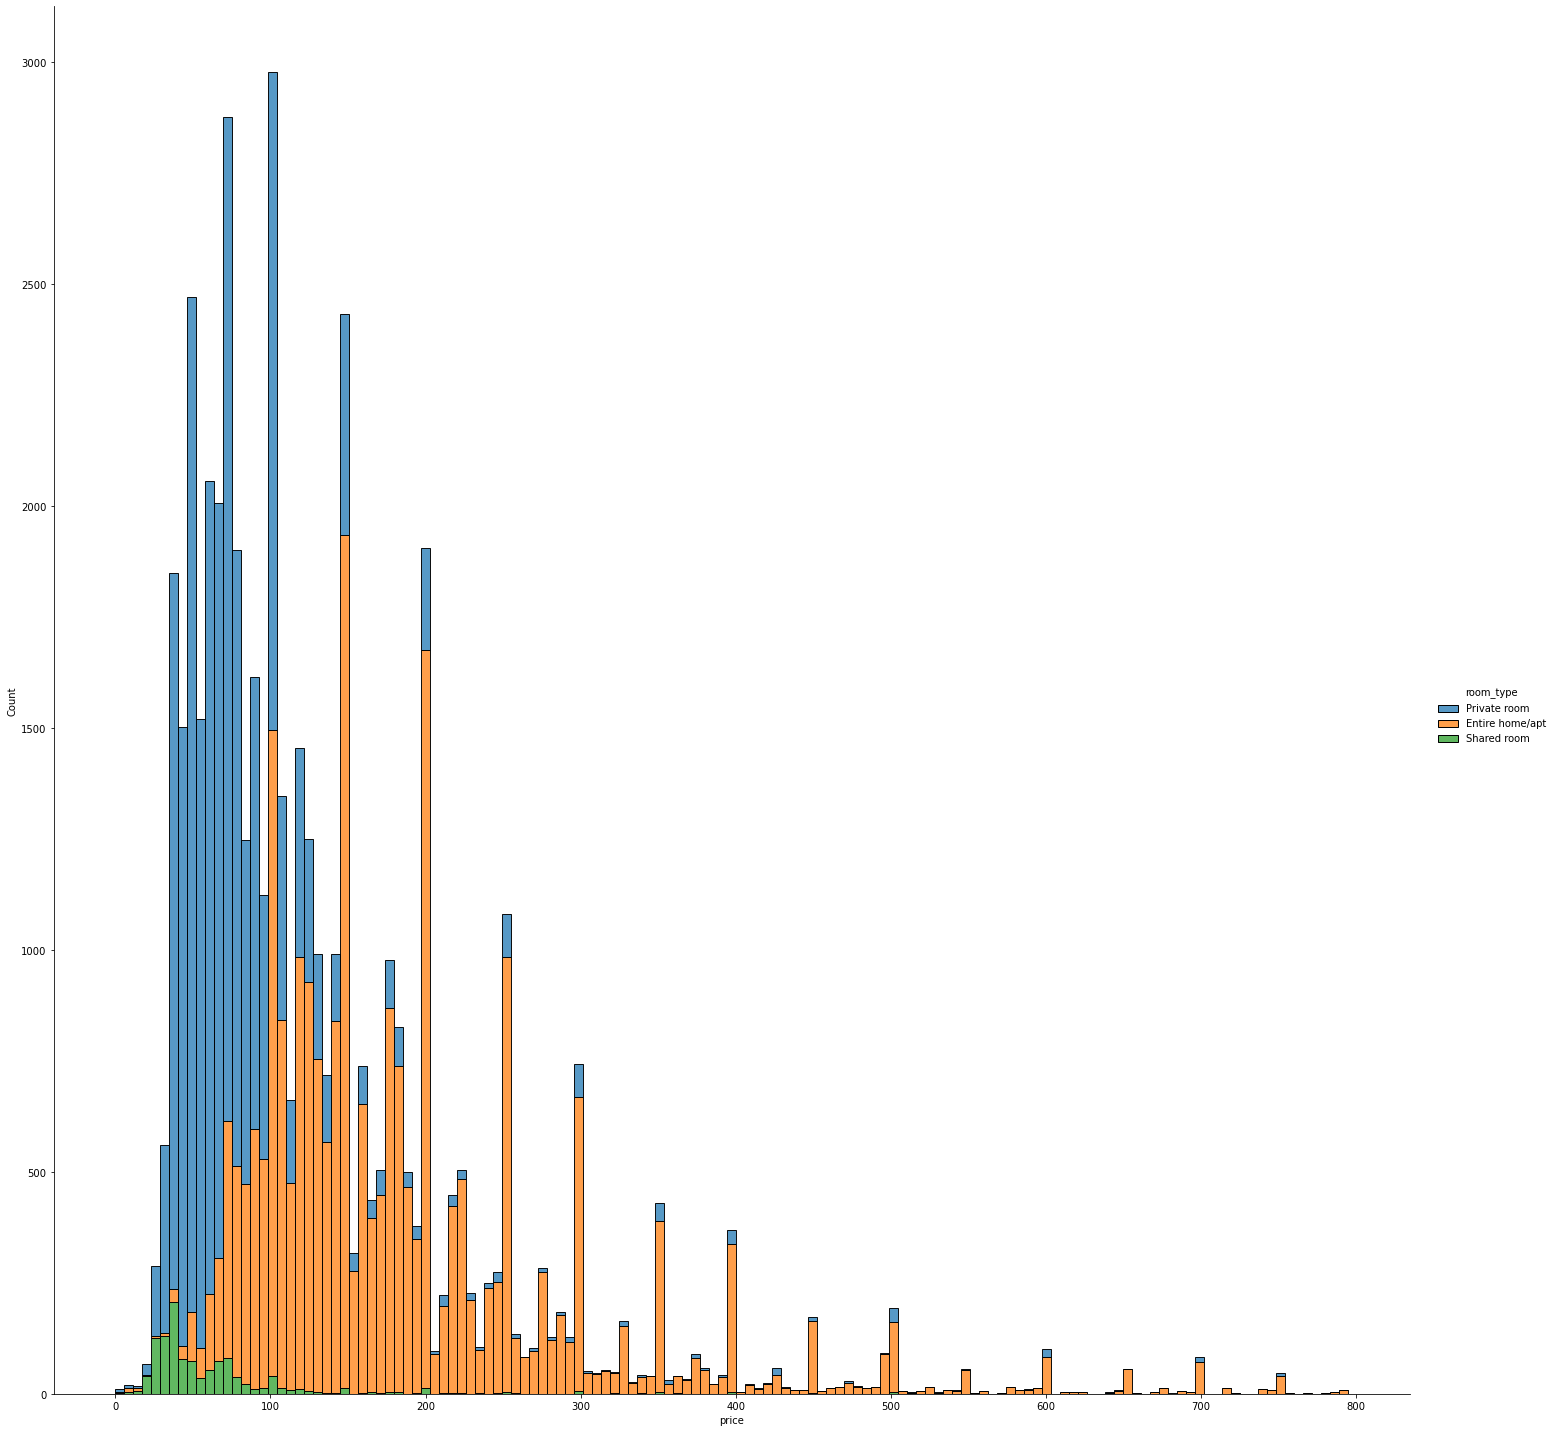

In [18]:
#Можем также посмотреть на распределение количества цен в зависимости от типов сдаваемого жилья.
sns.displot(data=df, x="price", hue="room_type", multiple="stack", height=20)
#Видно что в основном сдаются индивидуальные комнаты при цене до 100 долл.
#После 100 долл количество целиком сданного жилья и индивидуальной комнат примерно равно  
#Общих комнат сдается гораздо меньшее количество при цене до 100 долл.

In [19]:
#Далее попробуем ввести новый признак в датасет, а именно: зная координаты Манхэттена 
#(самого дорогого района) и при помощи широты и долготы, а также евклидового расстояния - 
#создаем новую переменную - расстояние от квартиры до этого района. 
#И далее можно будет оценить увеличивает ли данный признак качество модели.

In [20]:
#Сделал все максимально просто из-за того что если брать готовые однострочные формулы возникают ошибки.
Manhattan_latitude = 40.7834
Manhattan_longitude = -73.9662

In [21]:
latitude = np.array((df['latitude']))
longitude = np.array((df['longitude']))

In [22]:
point_1 = np.array((Manhattan_latitude-latitude))
point_1=np.square(point_1)
point_1

array([0.01847153, 0.00088685, 0.00065638, ..., 0.00098282, 0.00067029,
       0.00037481])

In [23]:
point_2=np.array((Manhattan_longitude-longitude))
point_2=np.square(point_2)
point_2

array([3.806890e-05, 3.087049e-04, 5.904900e-04, ..., 3.073009e-04,
       6.210064e-04, 5.349969e-04])

In [24]:
distance=point_1+point_2
euclidian_distance=np.sqrt(distance)
euclidian_distance


array([0.13604998, 0.03457677, 0.03531111, ..., 0.03591829, 0.03593464,
       0.030163  ])

In [25]:
df['distance_to_manhattan'] = euclidian_distance.tolist()

In [26]:
df=df.reindex(columns=['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'distance_to_manhattan', 
                    'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365'])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,distance_to_manhattan,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,0.136050,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,0.034577,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,0.035311,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,0.098471,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,0.026863,Entire home/apt,80,10,9,0.10,1,0


In [27]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [28]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[['neighbourhood_group']])
ohe_result.toarray()
encoding_data=pd.DataFrame(ohe_result.toarray(), columns=ohe.categories_)
encoding_data.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [91]:
ohe_result2 = ohe.fit_transform(df[['room_type']])
ohe_result2.toarray()
encoding_data_2=pd.DataFrame(ohe_result2.toarray(), columns=ohe.categories_)
encoding_data_2.head()

,Entire home/apt,Private room,Shared room
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [131]:
ohe_data=encoding_data.join(encoding_data_2, how = 'right', lsuffix='left', rsuffix='right')
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48403 entries, 0 to 48402
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Bronx,)            48403 non-null  float64
 1   (Brooklyn,)         48403 non-null  float64
 2   (Manhattan,)        48403 non-null  float64
 3   (Queens,)           48403 non-null  float64
 4   (Staten Island,)    48403 non-null  float64
 5   (Entire home/apt,)  48403 non-null  float64
 6   (Private room,)     48403 non-null  float64
 7   (Shared room,)      48403 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [133]:
ohe_data.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [135]:
df_ss=df[['distance_to_manhattan','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365']]
df_ss.head()

,distance_to_manhattan,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.136050,149,1,9,0.21,6,365
1,0.034577,225,1,45,0.38,2,355
2,0.035311,150,3,0,0.00,1,365
3,0.098471,89,1,270,4.64,1,194
4,0.026863,80,10,9,0.10,1,0


In [136]:
# Выделим фичи и целевую переменную
x = df_ss.drop('price', axis=1)
y = df_ss['price']

In [137]:
# Разделим данные на train и test (70/30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 33882
Test cases: 14521


In [138]:
# Обучение модели
from sklearn import linear_model
# тренируем  модель линейной регрессии 
model = linear_model.LinearRegression().fit(x_train, y_train)
print (model)

LinearRegression()


MSE: 9513.564896298773
RMSE: 97.53750507522105
R2: 0.09411785390128735
MAE: 68.51713805177977


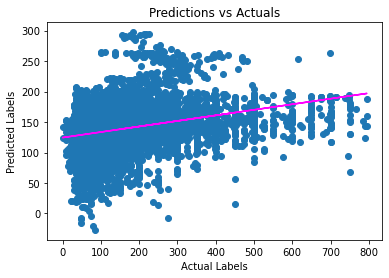

In [139]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [65]:
#Далее попробуем шкалировать непрерывные переменные.

In [140]:
# Приведем выбранные фичи к одному масштабу, с помощью StandardScaler для повышения точности модели
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(df_ss[['distance_to_manhattan','price','minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365']])
scaled_features = scaler.transform(df_ss[['distance_to_manhattan', 'price', 'minimum_nights','number_of_reviews','reviews_per_month',
                                          'calculated_host_listings_count','availability_365']])
scaled_data= pd.DataFrame(scaled_features, columns = df_ss[['distance_to_manhattan', 'price', 'minimum_nights','number_of_reviews',
                                                            'reviews_per_month','calculated_host_listings_count',
                                                            'availability_365']].columns)
print(scaled_data)

       distance_to_manhattan     price  minimum_nights  number_of_reviews  \
0                   1.249866  0.113590       -0.294681          -0.322599   
1                  -0.957368  0.851309       -0.294681           0.482673   
2                  -0.941395  0.123297       -0.196135          -0.523917   
3                   0.432448 -0.468820       -0.294681           5.515618   
4                  -1.125168 -0.556181        0.148777          -0.322599   
...                      ...       ...             ...                ...   
48398               0.598866 -0.653250       -0.245408          -0.523917   
48399               0.204566 -0.944454       -0.146862          -0.523917   
48400              -0.928188 -0.216442        0.148777          -0.523917   
48401              -0.927832 -0.798852       -0.294681          -0.523917   
48402              -1.053376 -0.459113        0.000958          -0.523917   

       reviews_per_month  calculated_host_listings_count  availability_365 

In [141]:
#Выделим фичи и целевую переменную
x_2 = scaled_data.drop('price', axis=1)
y_2 = scaled_data['price']



In [142]:
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 33882
Test cases: 14521


In [143]:
# Обучение модели
from sklearn import linear_model
# тренируем  модель линейной регрессии 
model_2 = linear_model.LinearRegression().fit(x_train, y_train)
print (model_2)

LinearRegression()


MSE: 0.8963920114704794
RMSE: 0.9467798115034347
R2: 0.09411785390128702
MAE: 0.6650840925179554


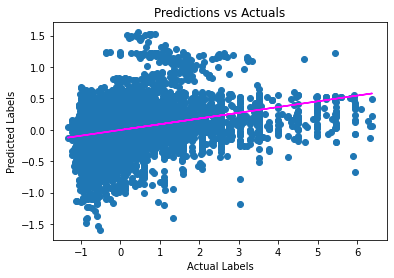

In [144]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_2.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
scaler_2.fit(df_ss[['distance_to_manhattan','price','minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365']])
scaled_features_2 = scaler_2.transform(df_ss[['distance_to_manhattan', 'price', 'minimum_nights','number_of_reviews','reviews_per_month',
                                          'calculated_host_listings_count','availability_365']])
scaled_data_2= pd.DataFrame(scaled_features_2, columns = df_ss[['distance_to_manhattan', 'price', 'minimum_nights','number_of_reviews',
                                                            'reviews_per_month','calculated_host_listings_count',
                                                            'availability_365']].columns)
print(scaled_data_2)

       distance_to_manhattan     price  minimum_nights  number_of_reviews  \
0                   0.337837  0.187421        0.000000           0.014308   
1                   0.078151  0.283019        0.000000           0.071542   
2                   0.080030  0.188679        0.001601           0.000000   
3                   0.241666  0.111950        0.000000           0.429253   
4                   0.058409  0.100629        0.007206           0.014308   
...                      ...       ...             ...                ...   
48398               0.261245  0.088050        0.000801           0.000000   
48399               0.214855  0.050314        0.002402           0.000000   
48400               0.081584  0.144654        0.007206           0.000000   
48401               0.081626  0.069182        0.000000           0.000000   
48402               0.066856  0.113208        0.004804           0.000000   

       reviews_per_month  calculated_host_listings_count  availability_365 

In [158]:
#Выделим фичи и целевую переменную
x_3 = scaled_data_2.drop('price', axis=1)
y_3 = scaled_data_2['price']

In [159]:
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x_3, y_3, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 33882
Test cases: 14521


In [160]:
# Обучение модели
from sklearn import linear_model
# тренируем  модель линейной регрессии 
model_3 = linear_model.LinearRegression().fit(x_train, y_train)
print (model_3)

LinearRegression()


MSE: 0.015052513581422844
RMSE: 0.12268868562920887
R2: 0.09411785390128702
MAE: 0.0861850793104148


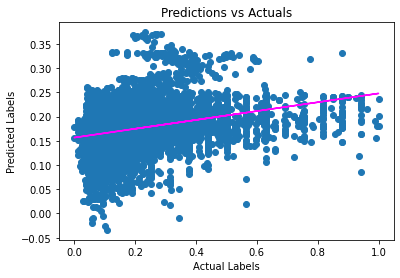

In [162]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_3.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
#Использование MinMaxScaler несущественно повышает метрики качества, поэтому далее буду использовать его.

In [ ]:
#Также проверим метрики без введения новой переменной.

In [197]:
scaled_data_3 = scaled_data_2.drop(["distance_to_manhattan" ], axis=1)
scaled_data_3.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.187421,0.000000,0.014308,0.003590,0.015337,1.000000
1,0.283019,0.000000,0.071542,0.006496,0.003067,0.972603
2,0.188679,0.001601,0.000000,0.000000,0.000000,1.000000
3,0.111950,0.000000,0.429253,0.079316,0.000000,0.531507
4,0.100629,0.007206,0.014308,0.001709,0.000000,0.000000


In [199]:
#Выделим фичи и целевую переменную
x_5 = scaled_data_3.drop('price', axis=1)
y_5 = scaled_data_3['price']

In [200]:
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x_5, y_5, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 33882
Test cases: 14521


In [201]:
# Обучение модели
from sklearn import linear_model
# тренируем  модель линейной регрессии 
model_8 = linear_model.LinearRegression().fit(x_train, y_train)
print (model_8)

LinearRegression()


MSE: 0.016070135029562168
RMSE: 0.12676803630869324
R2: 0.032875916043530795
MAE: 0.09003929896169663


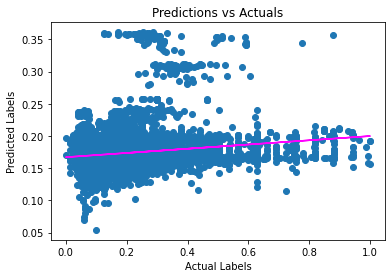

In [202]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_8.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
#Как можно видеть, введение переменной хоть и очень незначительно, но повышает метрики качества модели.

In [ ]:
#Далее объединим закодированные с помощью onehot encoder категориальные переменные и шкалированные с помощью minmaxscaler
#числовые параметры и посмотрим на метрики качества моделей.

In [163]:
df_total=ohe_data.join(scaled_data_2, how = 'right', lsuffix='left', rsuffix='right')
df_total.head()

,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)","(Entire home/apt,)","(Private room,)","(Shared room,)",distance_to_manhattan,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.337837,0.187421,0.000000,0.014308,0.003590,0.015337,1.000000
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.078151,0.283019,0.000000,0.071542,0.006496,0.003067,0.972603
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.080030,0.188679,0.001601,0.000000,0.000000,0.000000,1.000000
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.241666,0.111950,0.000000,0.429253,0.079316,0.000000,0.531507
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.058409,0.100629,0.007206,0.014308,0.001709,0.000000,0.000000


In [203]:
#Выделим фичи и целевую переменную
x_4 = df_total.drop('price', axis=1)
y_4 = df_total['price']

In [204]:
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x_4, y_4, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 33882
Test cases: 14521


In [205]:
# Обучение модели
from sklearn import linear_model
# тренируем  модель линейной регрессии 
model_4 = linear_model.LinearRegression().fit(x_train, y_train)
print (model_4)

LinearRegression()


MSE: 0.010829296419266972
RMSE: 0.10406390545845842
R2: 0.34827720114919347
MAE: 0.0662050490154655


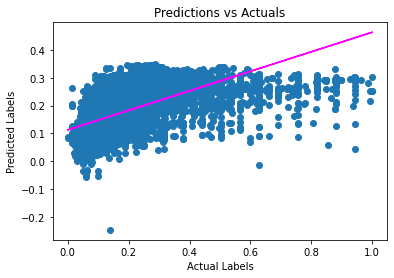

In [206]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_4.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
#Как видим при объединении, метрики качества подросли.

In [ ]:
#Попробуем другие модели RidgeCV, LassoCV и ElasticNetCV.

In [207]:
from sklearn.linear_model import LassoCV
model_5 = linear_model.LassoCV().fit(x_train, y_train)
print(model_5)

LassoCV()


MSE: 0.010831589085635562
RMSE: 0.10407492054109656
R2: 0.3481392251547504
MAE: 0.06613824082115077


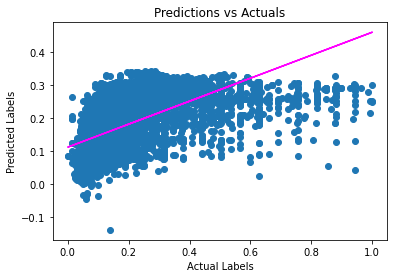

In [209]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_5.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [210]:
from sklearn.linear_model import RidgeCV
model_6 = linear_model.RidgeCV().fit(x_train, y_train)
print(model_6)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))


MSE: 0.010829656021380307
RMSE: 0.10406563323874173
R2: 0.3482555597713328
MAE: 0.06617746252833234


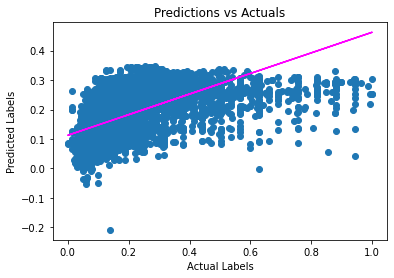

In [211]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_6.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [212]:
from sklearn.linear_model import ElasticNetCV
model_7 = linear_model.ElasticNetCV().fit(x_train, y_train)
print(model_7)

ElasticNetCV()


MSE: 0.01083382940766912
RMSE: 0.10408568301005244
R2: 0.3480043993184716
MAE: 0.06613690568879803


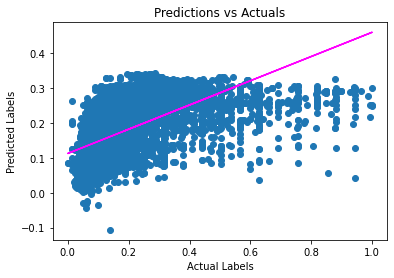

In [213]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Get predictions
predictions = model_7.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mae=mean_absolute_error(y_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Выводы: как можем видеть применение RidgeCV, LassoCV и ElasticNetCV с гиперпараметрами по умолчанию имеют практически одинаковые метрики качества относительно базовой линейной регрессии.